### Establishing Industry Standards Based on Clustering
Utilizing K-Means, Agglomerative Clustering, and DBSCAN for classification, a comprehensive industry standard incorporating multiple indicators will be developed. The hierarchical structure of this standard will be determined by clustering results, drawing inspiration from the SAE autonomous driving classification system, the European vehicle emission standards, or other existing frameworks.

# Prepare the Dataset

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA  

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,adjusted_rand_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

from sklearn.model_selection import train_test_split


In [18]:
# read the data
file_path = r"C:\Users\pengy\Desktop\datacw4\CO2 Emissions_Canada.csv"
df = pd.read_csv(file_path).head(50)

display(df)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


# 1.K-means Clustering

k-Means Workflow:

Input: Raw data points.

Step 1 - Initialise: Randomly select k entries as cluster centroids.

Step 2 - Check: Assign each data point to the nearest centroid. If changes occur, iterate; otherwise, stop.

Step 3 - Assign (Iterative): Assign data points to the cluster of the nearest centroid.

Step 4 - Refit (Iterative): Adjust centroids to the mean of the assigned points.

Step 5 - Finalise: Stop when assignments are stable; prepare clusters for output.

Output: Finalise clusters with stable centroids.

Now, we intruduce a lind of Evaluation Metrics Silhouette Score to evaluate the performance of clustering outcomes of k-Means and Agg in the above case.

Silhouette Score measures how similar an object is to its own cluster compared to other clusters. 

- 1 indicates that the data point is well-clustered and far from neighboring clusters.
- 0 suggests that the data point is on or very close to the decision boundary between two neighboring clusters.
- -1 implies that the data point may have been assigned to the wrong cluster.

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

where:
- $ a(i) $: The average distance between $ i $ and all other points in the same cluster.
- $ b(i) $: The minimum average distance from $ i $ to points in a the nearest cluster (the cluster that is not its own).

To obtain an overall Silhouette Score for a clustering result, we could average the individual scores of all points (Higher values indicate better-defined clusters):

$$
\frac{1}{N} \sum_{i=1}^{N} s(i)
$$



Explained variance ratio: [0.92544311 0.06406332 0.01049357]
Cumulative explained variance ratio: [0.92544311 0.98950643 1.        ]


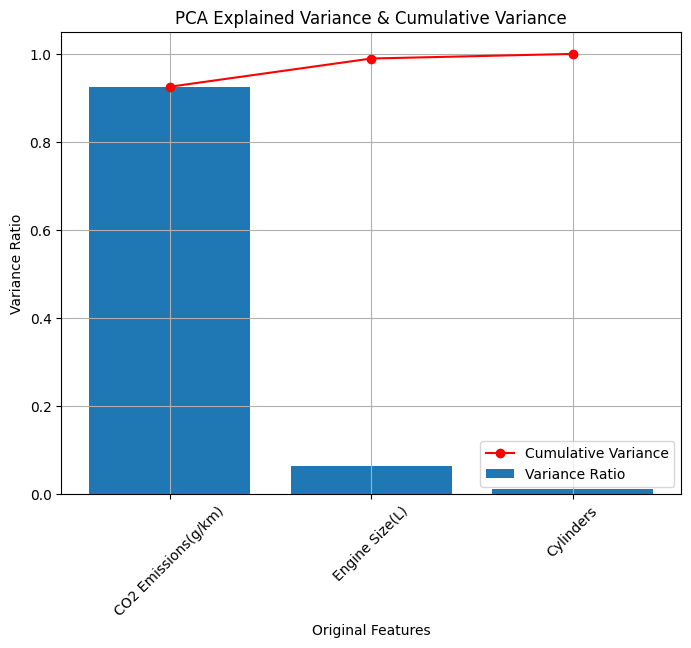

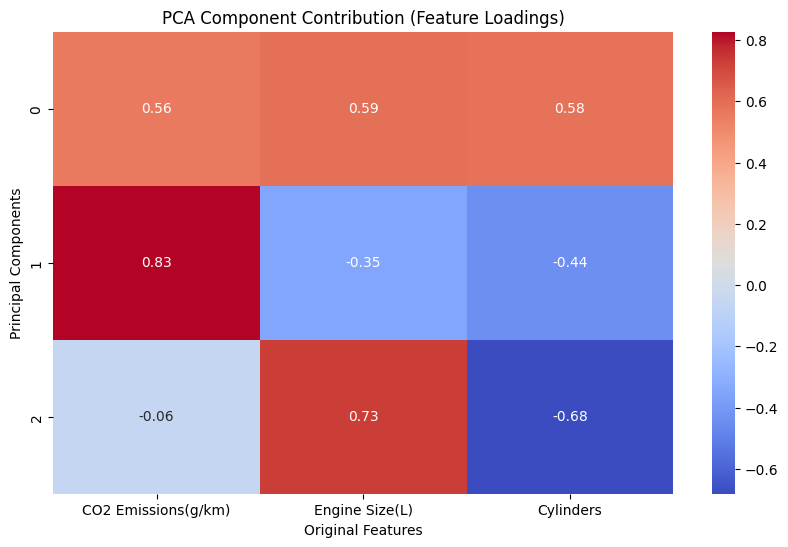

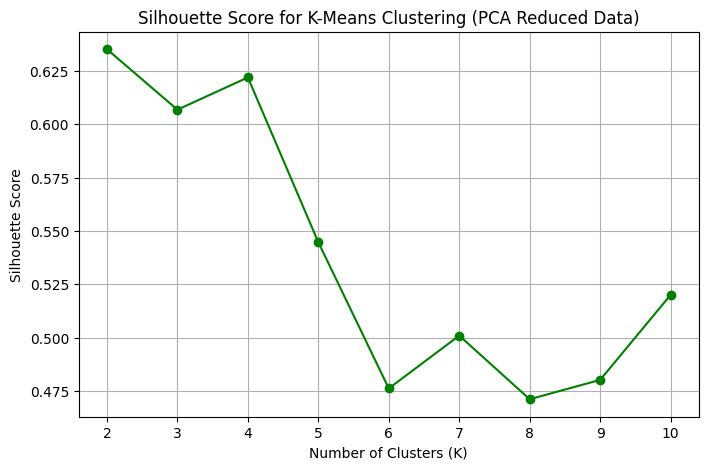

Best K value (Silhouette Score peak): 2
Chosen second-best K value (by observation): 4
Cluster Centers (Best K):
 [[-0.76682612 -0.03256644  0.00775673]
 [ 2.64128995  0.11217331 -0.02671763]]
Silhouette Score (Best K): 0.6352478425185758
Cluster Centers (Optimal K):
 [[-1.68807473  0.09935092 -0.0256809 ]
 [ 3.83450788 -0.56101014 -0.17914343]
 [ 2.04468099  0.44876503  0.04949528]
 [-0.10147989 -0.1278401   0.03190613]]
Silhouette Score (Optimal K): 0.6220194095999004
Inertia: 38.829182306289596


In [ ]:
# Dataset Split (80% Training Set, 20% Test Set)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Select Numerical Features
features = ['CO2 Emissions(g/km)', 'Engine Size(L)', 'Cylinders']

# Data Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_df[features])
X_test_scaled = scaler.transform(test_df[features])

# PCA Dimensionality Reduction
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Display PCA Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

print("Explained variance ratio:", explained_variance_ratio)
print("Cumulative explained variance ratio:", cumulative_variance_ratio)

# Retrieve Feature Names Corresponding to Each Principal Component
top_features = features

# Visualize PCA Contribution and Cumulative Contribution
plt.figure(figsize=(8, 6))
plt.bar(top_features, explained_variance_ratio, label='Variance Ratio')
plt.plot(top_features, cumulative_variance_ratio, marker='o', color='red', label='Cumulative Variance')
plt.xlabel('Original Features')
plt.ylabel('Variance Ratio')
plt.title('PCA Explained Variance & Cumulative Variance')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Get Feature Contribution for Each Principal Component
pca_components = pd.DataFrame(pca.components_, columns=features)

plt.figure(figsize=(10, 6))
sns.heatmap(pca_components, cmap='coolwarm', annot=True, fmt=".2f", cbar=True)
plt.title("PCA Component Contribution (Feature Loadings)")
plt.xlabel("Original Features")
plt.ylabel("Principal Components")
plt.show()

# Compute Silhouette Scores for Different K Values
k_values = range(2, 11)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_train_pca)
    silhouette_scores.append(silhouette_score(X_train_pca, labels))

# Visualize Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='g')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for K-Means Clustering (PCA Reduced Data)")
plt.grid(True)
plt.show()

# Select the Best K (Highest Silhouette Score)
best_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"Best K value (Silhouette Score peak): {best_k}")

# Manually Choose Second-best K (K=4)
optimal_k = 4
print(f"Chosen second-best K value (by observation): {optimal_k}")

# Perform KMeans Clustering with Best K and Second-best K
kmeans_best = KMeans(n_clusters=best_k, random_state=42, n_init=10)
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

train_df['KMeans Cluster (Best)'] = kmeans_best.fit_predict(X_train_pca)
test_df['KMeans Cluster (Best)'] = kmeans_best.predict(X_test_pca)

train_df['KMeans Cluster (Optimal)'] = kmeans_optimal.fit_predict(X_train_pca)
test_df['KMeans Cluster (Optimal)'] = kmeans_optimal.predict(X_test_pca)

# Evaluate Clustering Results
print("Cluster Centers (Best K):\n", kmeans_best.cluster_centers_)
print("Silhouette Score (Best K):", silhouette_score(X_train_pca, train_df['KMeans Cluster (Best)']))

print("Cluster Centers (Optimal K):\n", kmeans_optimal.cluster_centers_)
print("Silhouette Score (Optimal K):", silhouette_score(X_train_pca, train_df['KMeans Cluster (Optimal)']))

print("Inertia:", kmeans_best.inertia_)


PCA Contribution Analysis 
- Explained Variance Ratio 
The first principal component (PC1) contributes 92.54%, which indicates that the CO₂ Emissions feature plays a dominant role in the data and is the most important feature.
The second principal component (PC2) contributes about 6.41%, which means that the Engine Size (L) feature plays a secondary role in the data.
The third principal component (PC3) contributes only 1.05%, which is a very small contribution, indicating that the Cylinders feature provides less information in reducing the dimensionality of the data and can be considered as redundant information.

- Cumulative Explained Variance Ratio (CER) 
The cumulative contribution of the first two principal components (PC1 + PC2) reaches 99.89%, which is much higher than the PCA criterion of retaining 95% variance.
This means that in two dimensions, the data already approximate the original features well, and there is little gain in adding further principal components.

Optimal K value selection for KMeans clustering 
- Do not select K = 2: Although K=2 has the highest Silhouette Score, the goal of clustering is not just to aim for the highest profile coefficients, but also to take into account the actual business implications of the data and the interpretability of the clusters.Clustering with K=2 may divide the data simply into two classes, which, although the quality of the clusters is high, is too coarse and may not fully reveal the underlying complex structure in the data. For example, in a dataset with multidimensional characteristics such as CO₂ emissions, factors such as the type of vehicle, fuel consumption patterns, etc. may allow for more complex groupings in the data. Choosing K = 2 may misclassify some data points with significant differences into the same category, ignoring underlying patterns in the data.
- Choosing K = 4: The Silhouette Score curve shows that although K=4 has a slightly lower score than K=2, it is still at a high level (0.6220) and significantly outperforms the other options locally. Choosing K=4 can more fully capture the diversity in the data while ensuring a certain clustering quality. Especially in the data after PCA dimensionality reduction, although CO₂ emission dominates the first principal component as the main feature, the secondary components and subsequent features still contain other key information. Choosing K=4 can further explore the differences in these secondary features and help identify more potential subpopulations.


PCA Feature Loadings Analysis 
- First Principal Component (PC1): 
CO₂ Emissions (g/km): 0.56 (strong positive contribution) 
Engine Size(L): 0.59 (strong positive contribution) 
Cylinders: 0.58 (strong positive contribution) 
The main contribution of PC1 comes from the combined effects of The main contribution of PC1 comes from the combined effect of these three features.

- The second principal component (PC2) 
CO₂ Emissions(g/km): 0.82 (very strong positive contribution) 
Engine Size(L): -0.33 (weak negative contribution) 
Cylinders: -0.46 (weak negative contribution) 
PC2 emphasizes the independent effect of CO₂ Emissions and shows an inverse relationship with Engine Size(L) and Cylinders. Cylinders.

- The three principal components (PC3) 
CO₂ Emissions(g/km): -0.07 (very weak negative contribution) 
Engine Size(L): 0.74 (stronger positive contribution) 
Cylinders: -0.67 (stronger negative contribution) 
PC3 is mainly used to differentiate the difference between Engine Size and Cylinders. Since the contribution of CO₂ Emissions(g/km) is very small, it indicates that the effect of this principal component on CO₂ emissions is weak.

In [ ]:
# Train KMeans using the suboptimal K=4
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
train_df['KMeans Cluster (K=4)'] = kmeans_4.fit_predict(X_train_pca)
test_df['KMeans Cluster (K=4)'] = kmeans_4.predict(X_test_pca)

In [ ]:
# Calculate the feature range (minimum, maximum, median) for each cluster (K=4)
cluster_summary_k4 = train_df.groupby("KMeans Cluster (K=4)")[[
    "Engine Size(L)", "Cylinders", "CO2 Emissions(g/km)"
]].agg(["min", "max", "median"])

print("\nFeature range for clusters (K=4):")
print(cluster_summary_k4)


Cluster 的特征范围 (K=4):
                     Engine Size(L)             Cylinders             \
                                min  max median       min max median   
KMeans Cluster (K=4)                                                   
0                               1.5  2.4   2.00         4   4    4.0   
1                               5.2  6.3   5.90        10  12   12.0   
2                               4.0  4.7   4.45         8   8    8.0   
3                               3.0  3.7   3.00         6   6    6.0   

                     CO2 Emissions(g/km)              
                                     min  max median  
KMeans Cluster (K=4)                                  
0                                    136  242  214.0  
1                                    347  363  359.0  
2                                    288  407  346.0  
3                                    217  304  253.0  


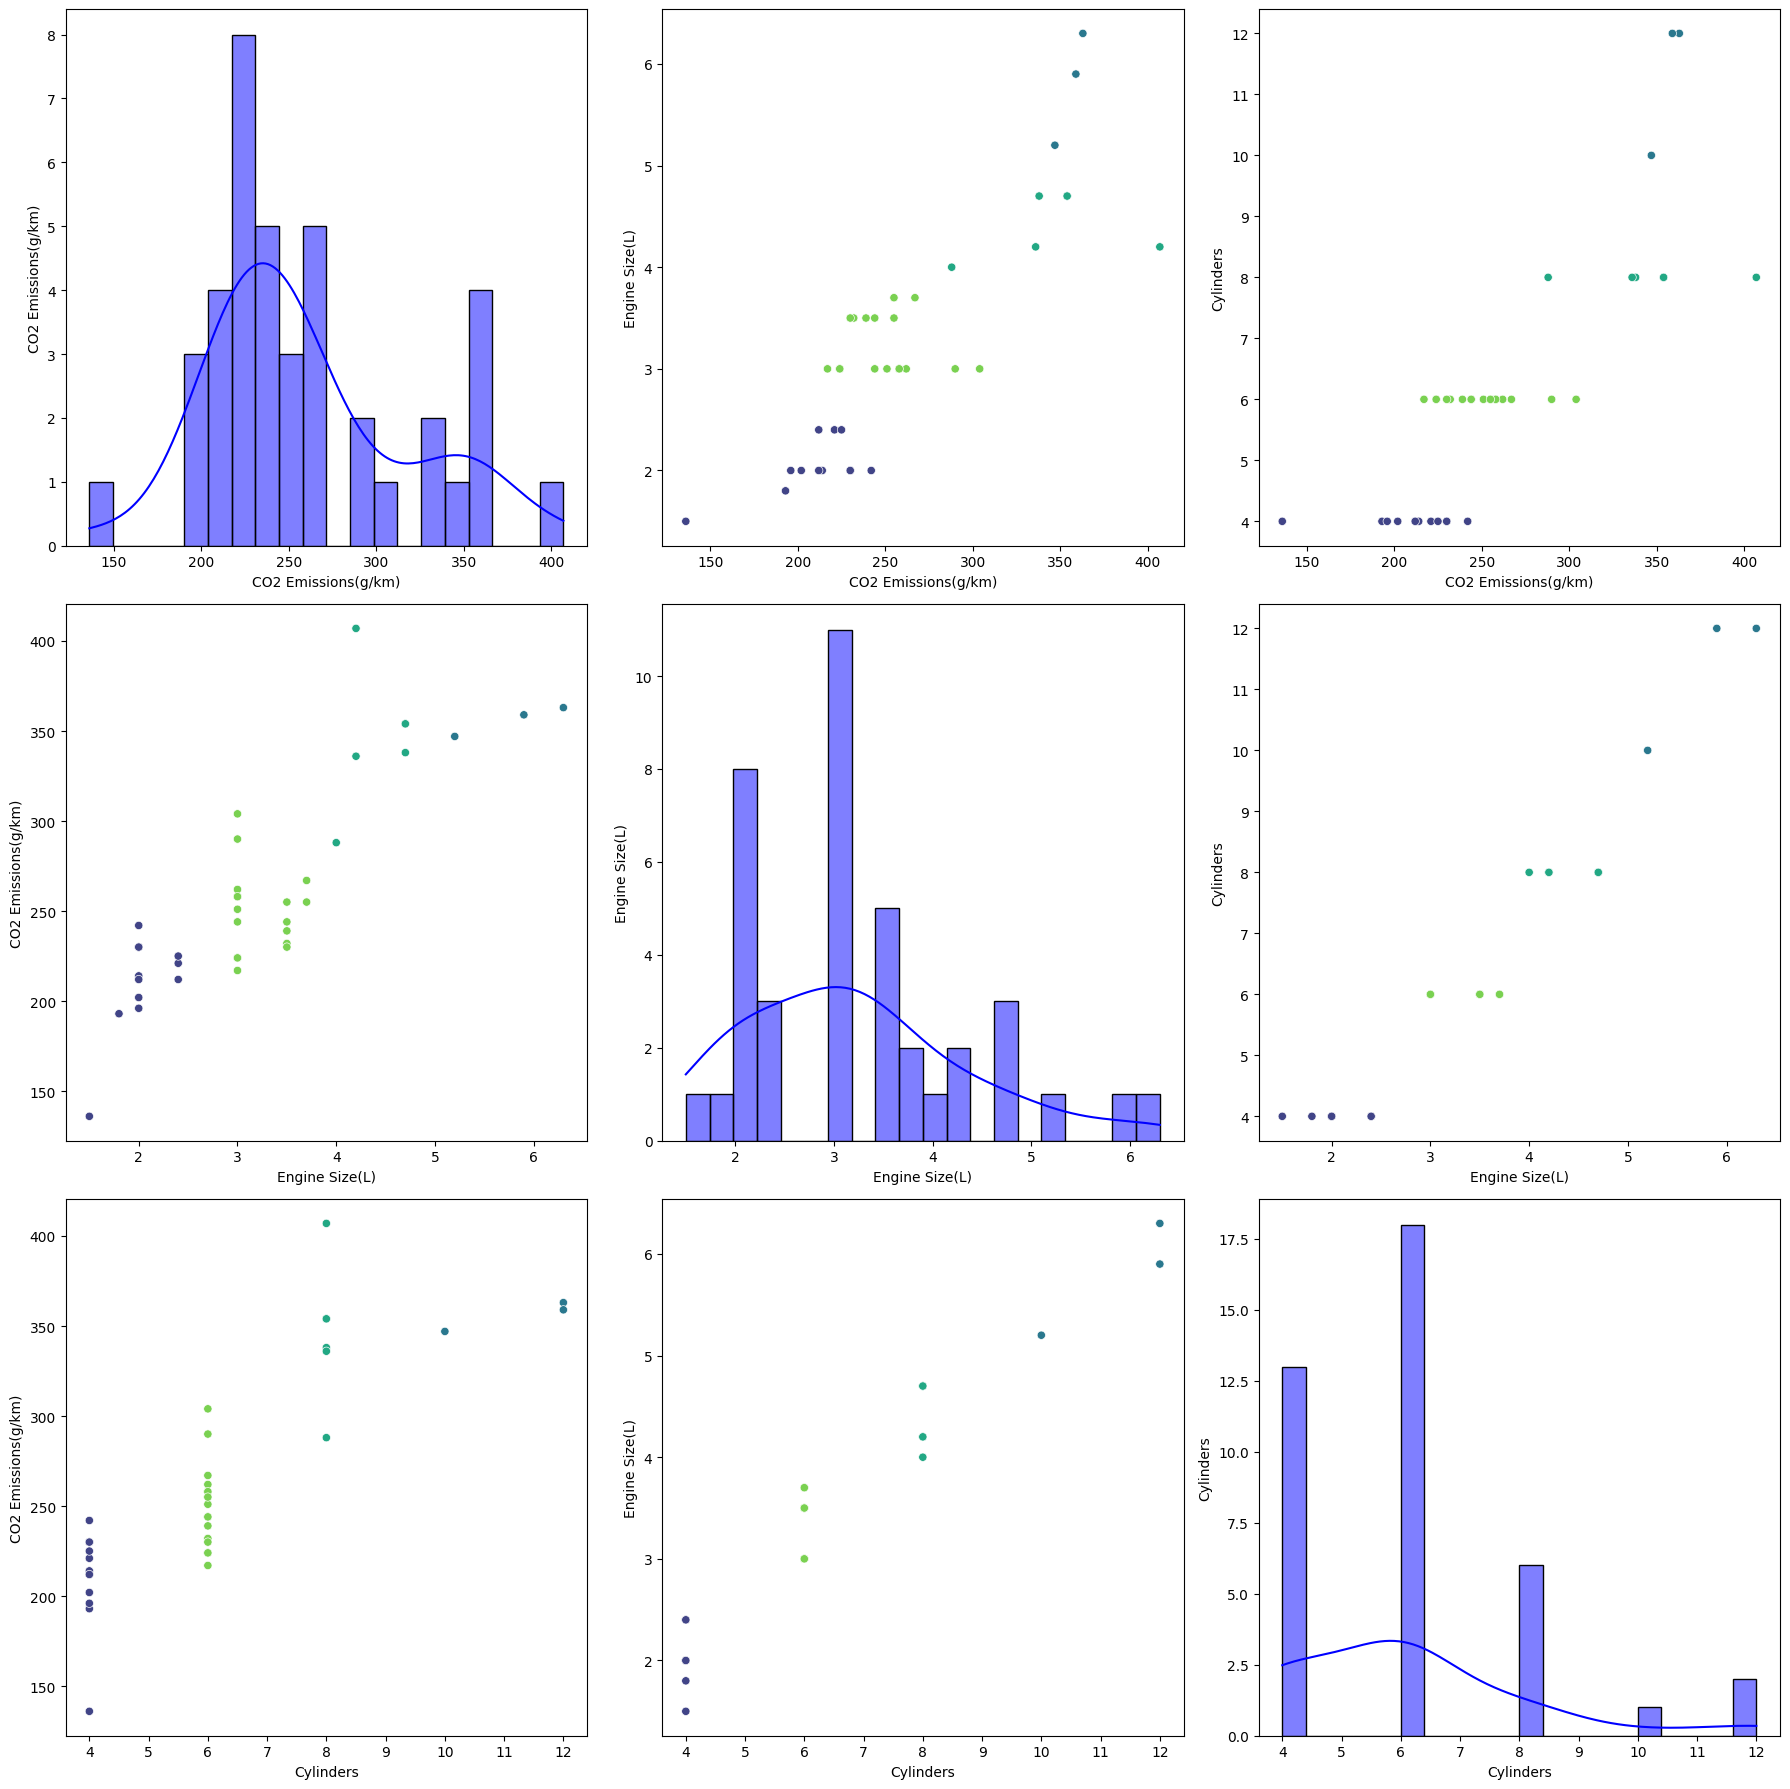


【KMeans Cluster (K=4) 颜色映射】
Cluster 0: 颜色 #404387
Cluster 1: 颜色 #29788e
Cluster 2: 颜色 #22a784
Cluster 3: 颜色 #79d151


In [ ]:
# Create color mapping
palette = sns.color_palette('viridis', 4)
cluster_colors = {cluster: palette[idx] for idx, cluster in enumerate(sorted(train_df['KMeans Cluster (K=4)'].unique()))}

# Feature comparison matrix (cluster visualization)
fig, axes = plt.subplots(len(features), len(features), figsize=(18, 18))

for i, feature_x in enumerate(features):
    for j, feature_y in enumerate(features):
        ax = axes[i, j]

        if i == j:
            sns.histplot(train_df[feature_x], bins=20, kde=True, ax=ax, color="blue")
            ax.set_ylabel("")
        else:
            sns.scatterplot(x=train_df[feature_x], 
                            y=train_df[feature_y], 
                            hue=train_df['KMeans Cluster (K=4)'], 
                            palette=palette, 
                            ax=ax, 
                            legend=False)

        ax.set_xlabel(feature_x)
        ax.set_ylabel(feature_y)

plt.tight_layout()
plt.show()

# Print color-to-cluster mapping
print("\n[KMeans Cluster (K=4) Color Mapping]")
for cluster, color in cluster_colors.items():
    rgb_to_hex = '#{:02x}{:02x}{:02x}'.format(
        int(color[0]*255), int(color[1]*255), int(color[2]*255)
    )
    print(f"Cluster {cluster}: Color {rgb_to_hex}")


# 2.Agglomerative Hierachical Clustering

Explained variance ratio: [0.92544311 0.06406332 0.01049357]
Cumulative explained variance ratio: [0.92544311 0.98950643 1.        ]


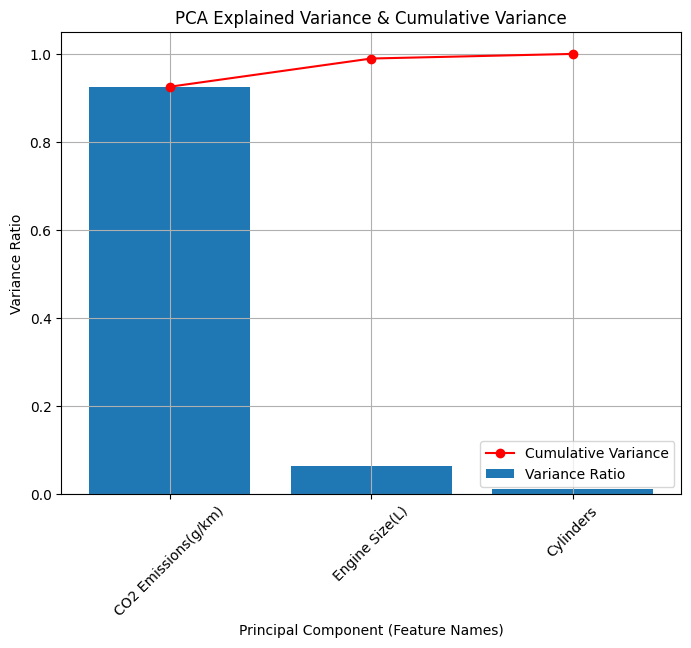

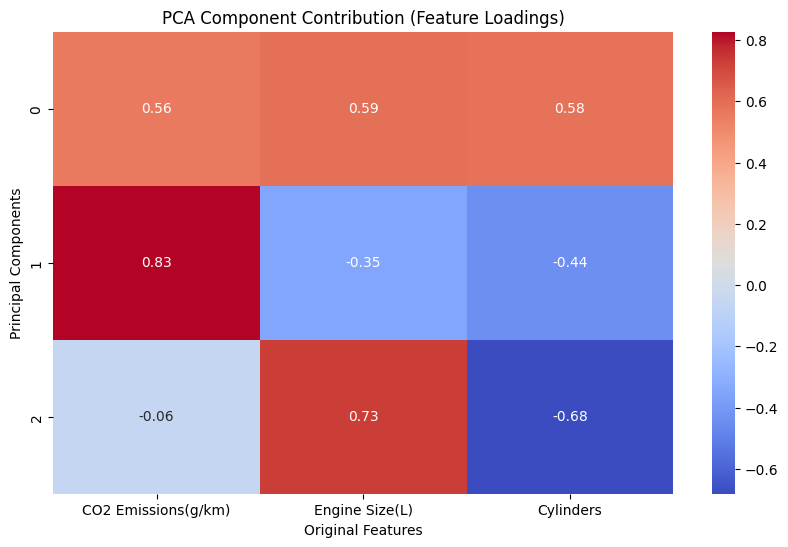

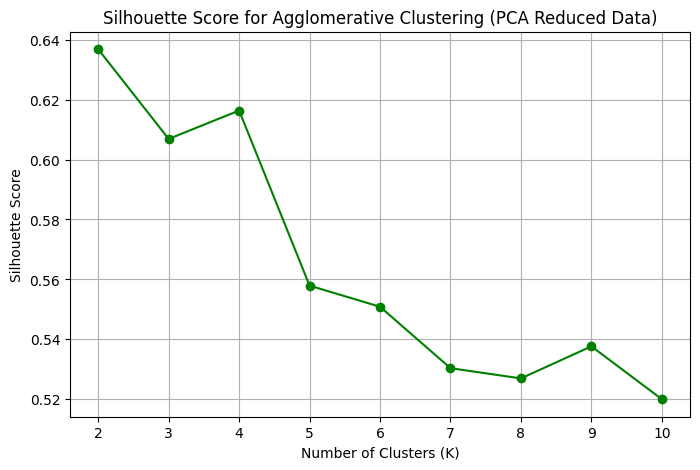

Silhouette Score for K=2: 0.6368
Silhouette Score for K=4: 0.6164
Best K value (Silhouette Score peak): 2
Chosen second-best K value (by observation): 4


In [ ]:
# Dataset split (80% training set, 20% test set)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Select numerical features
features = ['CO2 Emissions(g/km)', 'Engine Size(L)', 'Cylinders']

# Data standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_df[features])
X_test_scaled = scaler.transform(test_df[features])

# PCA dimensionality reduction
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Display PCA explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

print("Explained variance ratio:", explained_variance_ratio)
print("Cumulative explained variance ratio:", cumulative_variance_ratio)

# Visualize PCA variance contribution and cumulative contribution
plt.figure(figsize=(8, 6))
plt.bar(features[:len(explained_variance_ratio)], explained_variance_ratio, label='Variance Ratio')
plt.plot(features[:len(cumulative_variance_ratio)], cumulative_variance_ratio, marker='o', color='red', label='Cumulative Variance')
plt.xlabel('Principal Component (Feature Names)')
plt.ylabel('Variance Ratio')
plt.title('PCA Explained Variance & Cumulative Variance')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Obtain feature contributions for each principal component
pca_components = pd.DataFrame(pca.components_, columns=features)

plt.figure(figsize=(10, 6))
sns.heatmap(pca_components, cmap='coolwarm', annot=True, fmt=".2f", cbar=True)
plt.title("PCA Component Contribution (Feature Loadings)")
plt.xlabel("Original Features")
plt.ylabel("Principal Components")
plt.show()

# Compute silhouette scores for different K values
k_values = range(2, 11)
silhouette_scores = []

for k in k_values:
    agg_clustering = AgglomerativeClustering(n_clusters=k)
    labels = agg_clustering.fit_predict(X_train_pca)
    silhouette_scores.append(silhouette_score(X_train_pca, labels))

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='g')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Agglomerative Clustering (PCA Reduced Data)")
plt.grid(True)
plt.show()

# Output silhouette scores for K=2 and K=4
print(f"Silhouette Score for K=2: {silhouette_scores[0]:.4f}")
print(f"Silhouette Score for K=4: {silhouette_scores[2]:.4f}")

# Select the best K (Silhouette Score peak)
best_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"Best K value (Silhouette Score peak): {best_k}")

# Manually select the second-best K (K=4)
optimal_k = 4
print(f"Chosen second-best K value (by observation): {optimal_k}")

# Perform Agglomerative Clustering using the best K and second-best K
train_df['Agglomerative Cluster (Best)'] = AgglomerativeClustering(n_clusters=best_k).fit_predict(X_train_pca)
test_df['Agglomerative Cluster (Best)'] = AgglomerativeClustering(n_clusters=best_k).fit_predict(X_test_pca)

train_df['Agglomerative Cluster (Optimal)'] = AgglomerativeClustering(n_clusters=optimal_k).fit_predict(X_train_pca)
test_df['Agglomerative Cluster (Optimal)'] = AgglomerativeClustering(n_clusters=optimal_k).fit_predict(X_test_pca)

In [ ]:
# Calculate the feature range (minimum, maximum, median) for each cluster
cluster_summary = train_df.groupby("Agglomerative Cluster (Optimal)")[[
    "Engine Size(L)", "Cylinders", "CO2 Emissions(g/km)"
]].agg(["min", "max", "median"]).fillna(0)

print("\nFeature range for clusters (Optimal K):")
print(cluster_summary)


Cluster 的特征范围 (Optimal K):
                                Engine Size(L)             Cylinders      \
                                           min  max median       min max   
Agglomerative Cluster (Optimal)                                            
0                                          3.0  4.0    3.0         6   8   
1                                          5.2  6.3    5.9        10  12   
2                                          1.5  2.4    2.0         4   4   
3                                          4.2  4.7    4.7         8   8   

                                       CO2 Emissions(g/km)              
                                median                 min  max median  
Agglomerative Cluster (Optimal)                                         
0                                  6.0                 217  304  255.0  
1                                 12.0                 347  363  359.0  
2                                  4.0                 136  242  214.0  
3

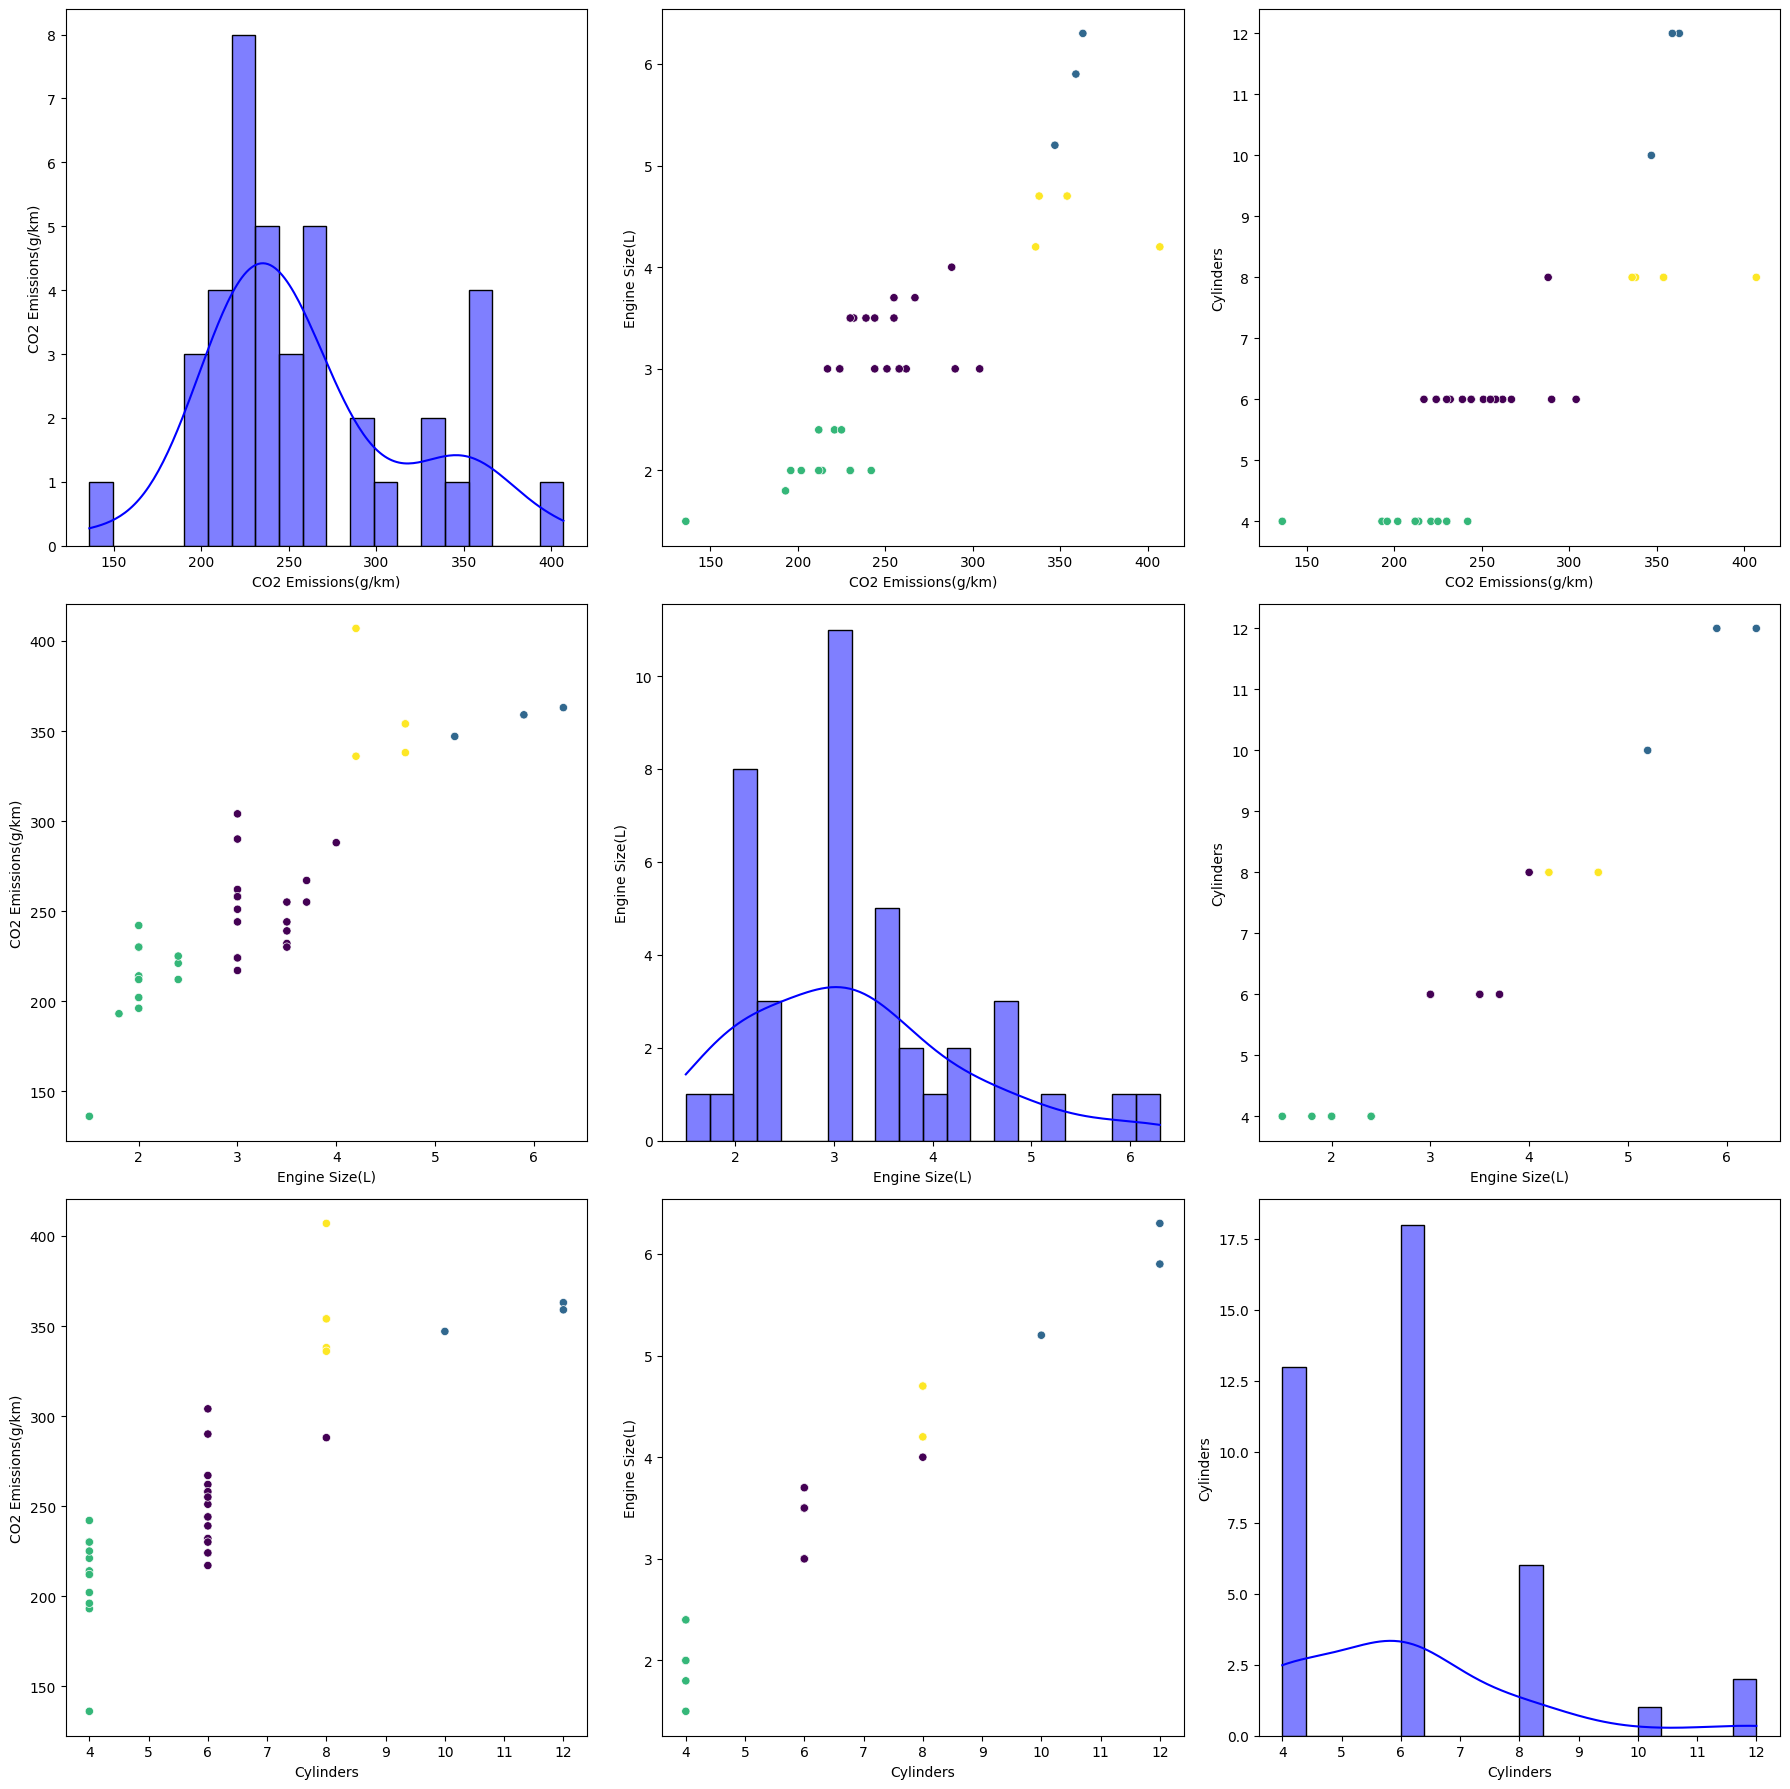


【Agglomerative Cluster (Optimal) 颜色映射】
Cluster 0: 颜色 #404387
Cluster 1: 颜色 #29788e
Cluster 2: 颜色 #22a784
Cluster 3: 颜色 #79d151


In [ ]:
# Feature comparison matrix (cluster visualization)
fig, axes = plt.subplots(len(features), len(features), figsize=(18, 18))

for i, feature_x in enumerate(features):
    for j, feature_y in enumerate(features):
        ax = axes[i, j]

        if i == j:
            sns.histplot(train_df[feature_x], bins=20, kde=True, ax=ax, color="blue")
            ax.set_ylabel("")
        else:
            sns.scatterplot(x=train_df[feature_x], 
                            y=train_df[feature_y], 
                            hue=train_df['Agglomerative Cluster (Optimal)'],
                            palette='viridis', ax=ax, legend=False)

        ax.set_xlabel(feature_x)
        ax.set_ylabel(feature_y)

plt.tight_layout()
plt.show()

# Create color mapping
palette = sns.color_palette('viridis', len(train_df['Agglomerative Cluster (Optimal)'].unique()))  
cluster_colors = {cluster: palette[idx] for idx, cluster in enumerate(sorted(train_df['Agglomerative Cluster (Optimal)'].unique()))}

# Print color-to-cluster mapping
print("\n[Agglomerative Cluster (Optimal) Color Mapping]")
for cluster, color in cluster_colors.items():
    rgb_to_hex = '#{:02x}{:02x}{:02x}'.format(
        int(color[0]*255), int(color[1]*255), int(color[2]*255)
    )
    print(f"Cluster {cluster}: Color {rgb_to_hex}")


# 3.Density-based Clustering: DBSCAN 

Density-Based Spatial Clustering of Applications with Noise (DBSCAN) is a popular clustering algorithm used in data mining and machine learning to identify clusters and outliers. Unlike k-Means, which requires the number of clusters to be specified in advance, DBSCAN can automatically determine the number of clusters based on the density of data points.

The algorithm is characterised by the following key concepts:

- **Epsilon (eps)**: The maximum distance between two points for them to be considered as part of the same neighborhood.

- **MinPts**: The minimum number of points required to form a dense region (i.e., a cluster).

- **Core Point**: A point that has at least `MinPts` points within its `eps` neighborhood.

- **Border Point**: A point that is not a core point but falls within the `eps` neighborhood of a core point.

- **Noise Point**: A point that is neither a core point nor a border point.

A general discription of the algorithm is as follows.
1. Label all points as unvisited.

2. For each unvisited point:
    - Mark the point as visited.
    
    - Retrieve its `eps` neighborhood.
    
    - If the point is a core point (i.e., the neighborhood contains at least `MinPts` points):
      
      - Create a new cluster and add the point to the cluster.
      
      - Expand the cluster by recursively adding all density-reachable points (i.e., points within `eps` distance from any point in the cluster).
    
    - If the point is not a core point, mark it as noise.

3. Repeat until all points have been visited.

DBSCAN is particularly effective for datasets with noise and clusters of varying shapes and sizes. However, its performance can be sensitive to the choice of `eps` and `MinPts` parameters.

The choice to utilize a k-distance plot to help more rationally select the optimal value of the eps parameter to enhance the DBSCAN effect is based on the principle that the “knee point” (elbow point) is usually selected. In the graph, the knee point is usually the inflection point where the distance value rises significantly. The obvious knee point occurs close to 0.6. This point is the beginning of a sharp rise in distance, indicating that data points within this distance are densely packed and form potential clusters, while data points beyond this distance may be noisy.

So in the end we chose optimal_eps = 0.6 (based on the knee points) and optimal_min_samples = 6 (usually 2 times the number of features)

Explained variance ratio: [0.92544311 0.06406332 0.01049357]
Cumulative explained variance ratio: [0.92544311 0.98950643 1.        ]


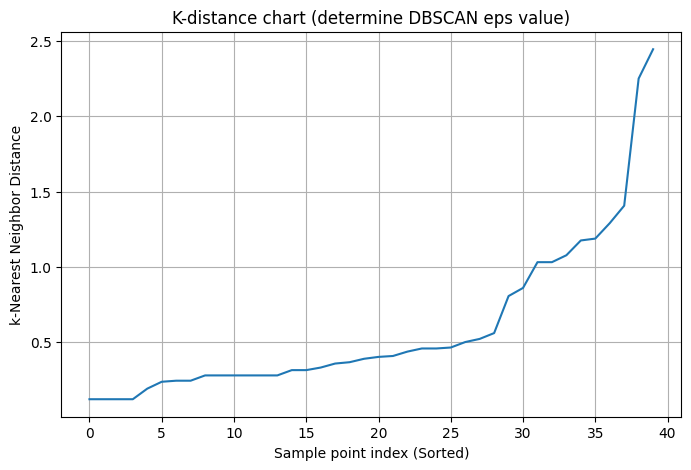

最终 DBSCAN 形成的簇数 (不包括噪声): 0
最终 DBSCAN 噪声点数 (Noise Points): 10
噪声点占比: 25.00%


In [ ]:
from sklearn.neighbors import NearestNeighbors

# Dataset split (80% training set, 20% test set)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Select numerical features
features = ['CO2 Emissions(g/km)', 'Engine Size(L)', 'Cylinders']

# Data standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_df[features])
X_test_scaled = scaler.transform(test_df[features])

# PCA dimensionality reduction
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Display PCA explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

print("Explained variance ratio:", explained_variance_ratio)
print("Cumulative explained variance ratio:", cumulative_variance_ratio)

# Use k-distance plot to determine the optimal eps
nearest_neighbors = NearestNeighbors(n_neighbors=5)
neighbors = nearest_neighbors.fit(X_train_pca)
distances, indices = neighbors.kneighbors(X_train_pca)

distances = np.sort(distances[:, -1])
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.title('K-distance chart (determine DBSCAN eps value)')
plt.xlabel('Sample point index (Sorted)')
plt.ylabel('k-Nearest Neighbor Distance')
plt.grid(True)
plt.show()

# Test different eps and min_samples
optimal_eps = 0.6  # Adjusted based on k-distance plot, selected by the elbow point
optimal_min_samples = 6  # Typically twice the number of features

dbscan = DBSCAN(eps=optimal_eps, min_samples=optimal_min_samples)
train_df['DBSCAN Cluster'] = dbscan.fit_predict(X_train_pca)
test_df['DBSCAN Cluster'] = dbscan.fit_predict(X_test_pca)

# Calculate DBSCAN clustering results
unique_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
noise_points = list(dbscan.labels_).count(-1)

print("Final number of DBSCAN clusters (excluding noise):", unique_clusters)
print("Final number of DBSCAN noise points:", noise_points)

# Noise points ratio
total_points = len(train_df)
noise_ratio = noise_points / total_points
print(f"Noise point ratio: {noise_ratio:.2%}")

One of the core features of DBSCAN is that it does not prespecify the number of clusters (K), but determines it based on the density of the data: dense areas are recognized as clusters and sparse areas are recognized as noise

In [ ]:
# Calculate the feature range (minimum, maximum, median) for each cluster
# Exclude noise points (-1)
cluster_summary = train_df[train_df['DBSCAN Cluster'] != -1].groupby("DBSCAN Cluster")[
    ["Engine Size(L)", "Cylinders", "CO2 Emissions(g/km)"]
].agg(["min", "max", "median"])

print("\nFeature range for clusters (excluding noise points):")
print(cluster_summary)


Cluster 的特征范围 (不含噪声点):
               Engine Size(L)             Cylinders             \
                          min  max median       min max median   
DBSCAN Cluster                                                   
0                         3.0  3.7    3.0         6   6    6.0   
1                         1.8  2.4    2.0         4   4    4.0   

               CO2 Emissions(g/km)              
                               min  max median  
DBSCAN Cluster                                  
0                              217  304  253.0  
1                              193  242  217.5  


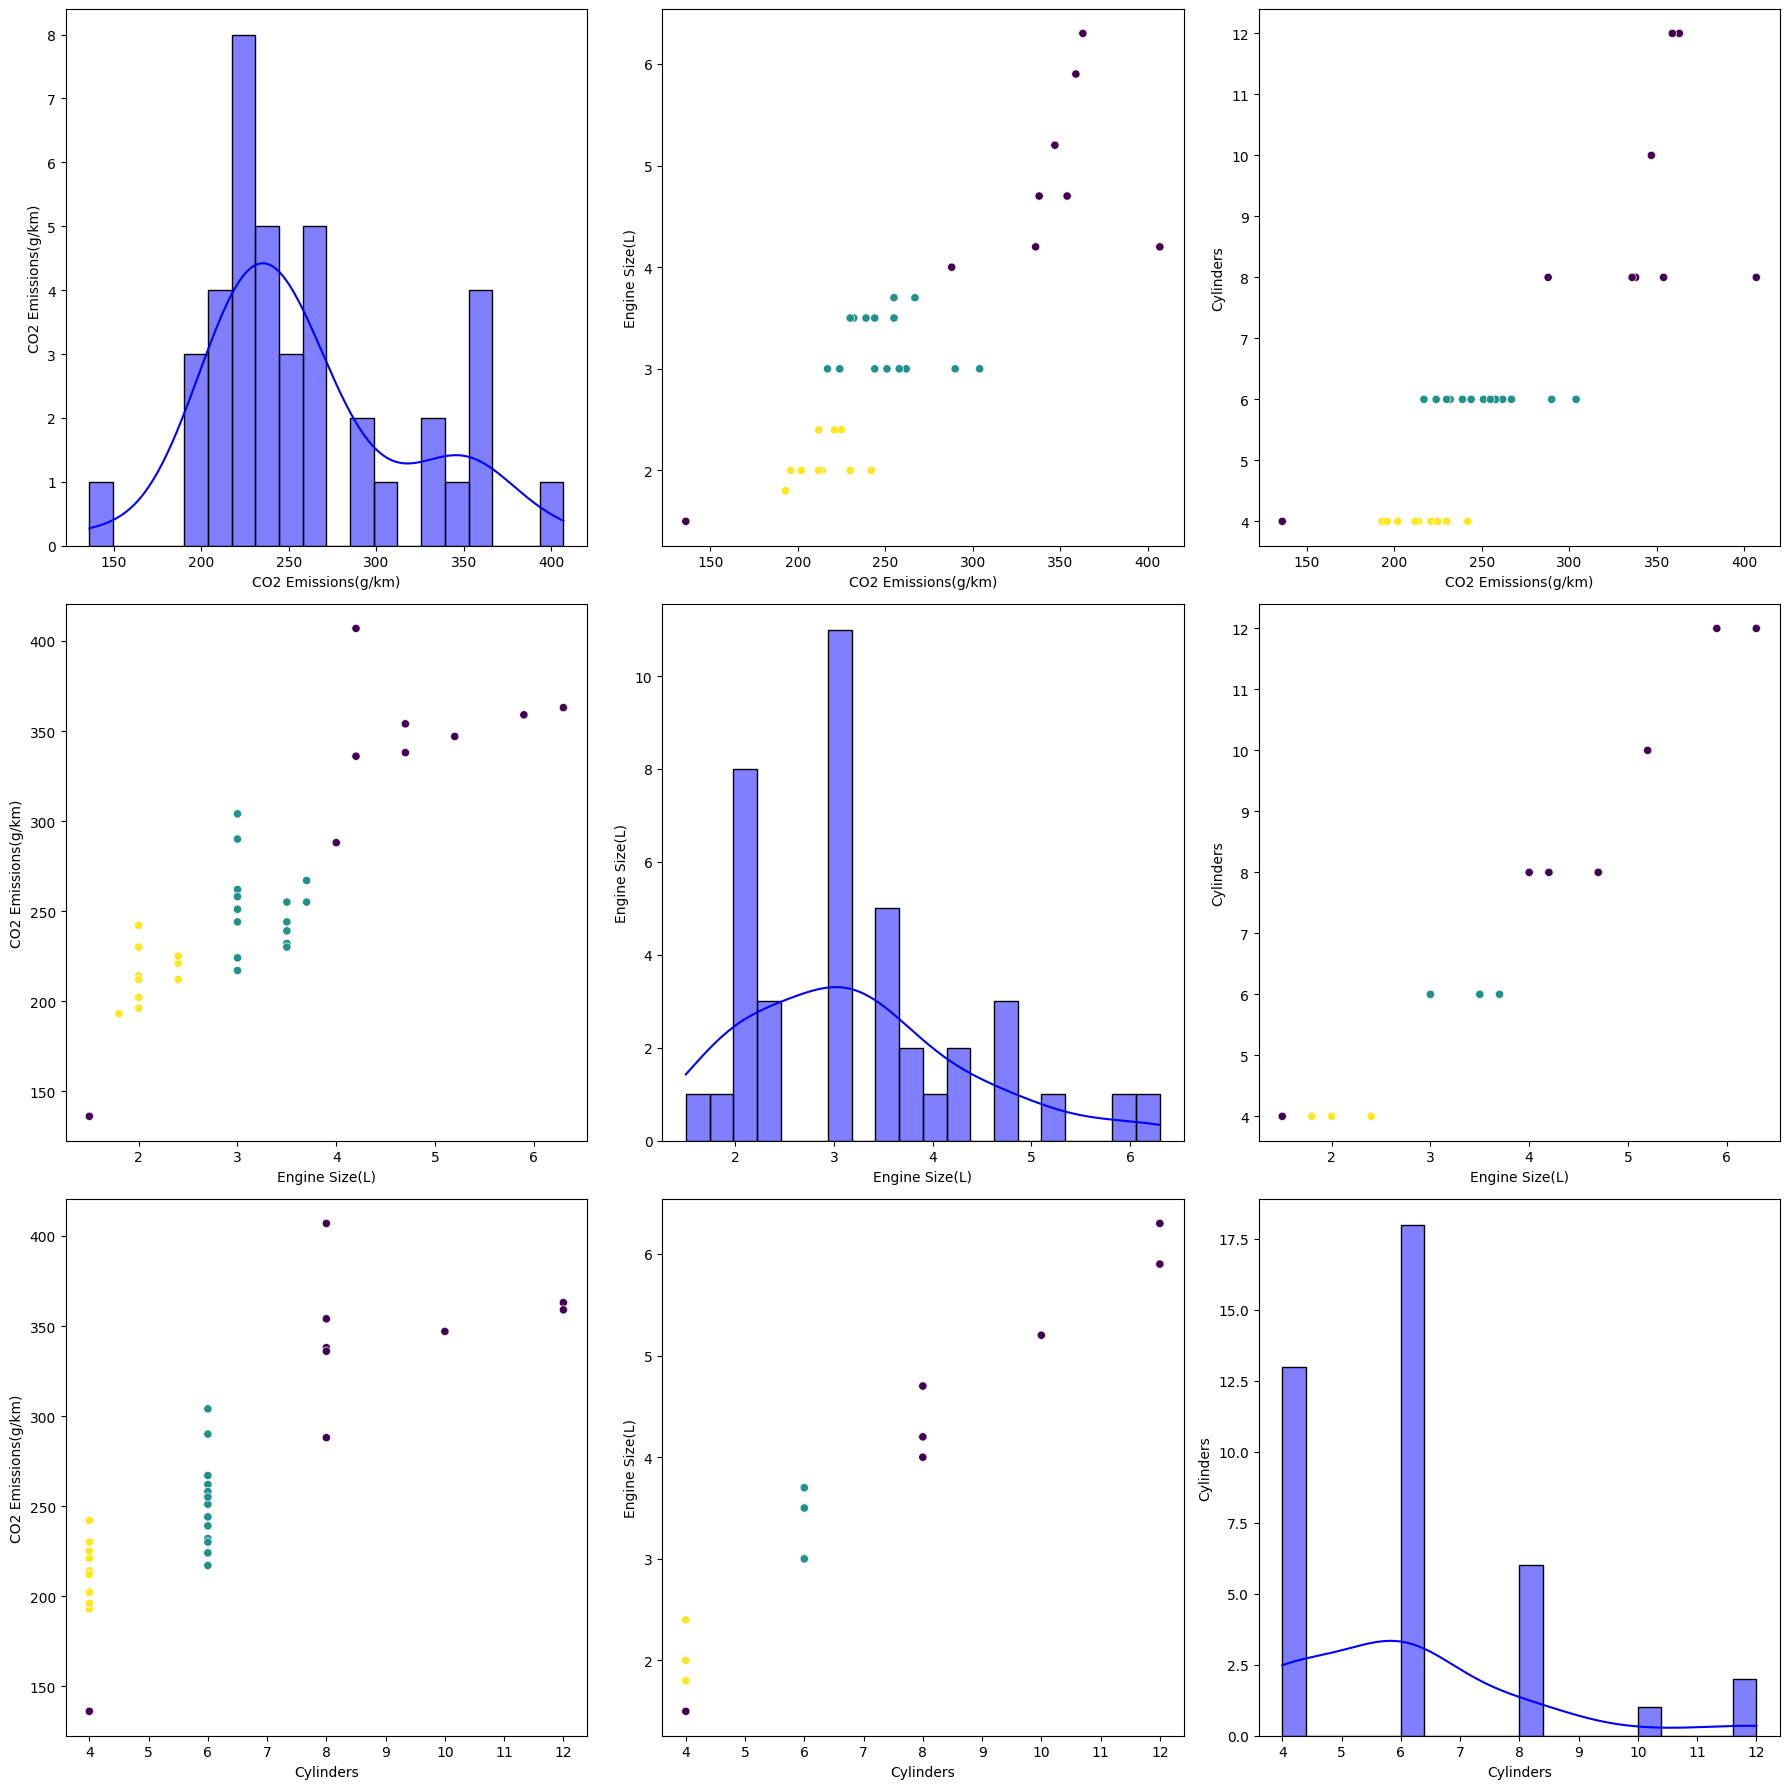


【DBSCAN Cluster 颜色映射】
Cluster -1: 颜色 #3a528b
Cluster 0: 颜色 #20908c
Cluster 1: 颜色 #5ec961


In [ ]:
# Feature comparison matrix (cluster visualization)
fig, axes = plt.subplots(len(features), len(features), figsize=(18, 18))

for i, feature_x in enumerate(features):
    for j, feature_y in enumerate(features):
        ax = axes[i, j]

        if i == j:
            sns.histplot(train_df[feature_x], bins=20, kde=True, ax=ax, color="blue")
            ax.set_ylabel("")
        else:
            sns.scatterplot(x=train_df[feature_x], 
                            y=train_df[feature_y], 
                            hue=train_df['DBSCAN Cluster'], 
                            palette='viridis', ax=ax, legend=False)

        ax.set_xlabel(feature_x)
        ax.set_ylabel(feature_y)

plt.tight_layout()
plt.show()

# Create color mapping
palette = sns.color_palette('viridis', len(train_df['DBSCAN Cluster'].unique()))  
cluster_colors = {cluster: palette[idx] for idx, cluster in enumerate(sorted(train_df['DBSCAN Cluster'].unique()))}

# Print color-to-cluster mapping
print("\n[DBSCAN Cluster Color Mapping]")
for cluster, color in cluster_colors.items():
    rgb_to_hex = '#{:02x}{:02x}{:02x}'.format(
        int(color[0]*255), int(color[1]*255), int(color[2]*255)
    )
    print(f"Cluster {cluster}: Color {rgb_to_hex}")


# Clustering models evaluation

Adjusted Rand Index (ARI) is used to quantify the consistency of the clustering results with the real labels, and is one of the metrics to evaluate the performance of clustering algorithms. It determines whether the clustering captures the real structure in the data by comparing the similarity between the clustered groupings and the real groupings.
The value range of ARI: [-1, 1] 

ARI = 1: clustering is in perfect agreement with the true label 

ARI = 0: clustering results are equivalent to random assignment 

ARI &lt; 0: clustering results are worse than random assignment (rare) 

ARI = (actual number of agreement - expected number of agreement) / (maximum possible number of agreement - expected number of agreement)

In [ ]:
from sklearn.metrics import adjusted_rand_score
# K-Means Clustering
optimal_k = 4
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

train_df['KMeans Cluster (Optimal)'] = kmeans_optimal.fit_predict(X_train_pca)
test_df['KMeans Cluster (Optimal)'] = kmeans_optimal.predict(X_test_pca)

# Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=optimal_k)
train_df['Agglomerative Cluster (Optimal)'] = agg_clustering.fit_predict(X_train_pca)

# Agglomerative Nearest Neighbors Assignment
agg_nn = NearestNeighbors(n_neighbors=1).fit(X_train_pca)
_, agg_indices = agg_nn.kneighbors(X_test_pca)
test_df['Agglomerative Cluster (Optimal)'] = train_df['Agglomerative Cluster (Optimal)'].iloc[agg_indices.flatten()].values

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.6, min_samples=6)
train_df['DBSCAN Cluster'] = dbscan.fit_predict(X_train_pca)

# Assign DBSCAN labels for the test set using NearestNeighbors
dbscan_nn = NearestNeighbors(n_neighbors=5).fit(X_train_pca)
distances, _ = dbscan_nn.kneighbors(X_test_pca)
epsilon = 0.6  
test_dbscan_labels = np.where(distances[:, -1] <= epsilon, train_df['DBSCAN Cluster'].mode()[0], -1)
test_df['DBSCAN Cluster'] = test_dbscan_labels

# ARI Scoring
# CO2 Label Encoding
CO2_train_labels = train_df['CO2 Emissions(g/km)'].astype('category').cat.codes
CO2_test_labels = test_df['CO2 Emissions(g/km)'].astype('category').cat.codes

# K-Means ARI
kmeans_ari_train = adjusted_rand_score(CO2_train_labels, train_df['KMeans Cluster (Optimal)'])
kmeans_ari_test = adjusted_rand_score(CO2_test_labels, test_df['KMeans Cluster (Optimal)'])

# Agglomerative ARI
agg_ari_train = adjusted_rand_score(CO2_train_labels, train_df['Agglomerative Cluster (Optimal)'])
agg_ari_test = adjusted_rand_score(CO2_test_labels, test_df['Agglomerative Cluster (Optimal)'])

# DBSCAN ARI
valid_dbscan_train_indices = train_df['DBSCAN Cluster'] != -1
dbscan_ari_train = adjusted_rand_score(
    train_df.loc[valid_dbscan_train_indices, 'CO2 Emissions(g/km)'].astype('category').cat.codes,
    train_df.loc[valid_dbscan_train_indices, 'DBSCAN Cluster']
) if valid_dbscan_train_indices.sum() > 0 else -1

valid_dbscan_test_indices = test_df['DBSCAN Cluster'] != -1
dbscan_ari_test = adjusted_rand_score(
    test_df.loc[valid_dbscan_test_indices, 'CO2 Emissions(g/km)'].astype('category').cat.codes,
    test_df.loc[valid_dbscan_test_indices, 'DBSCAN Cluster']
) if valid_dbscan_test_indices.sum() > 0 else -1

# Results Output
print("\nClustering Model Evaluation Results (Train Data):")
print(f"K-Means Adjusted Rand Index (ARI): {kmeans_ari_train:.4f}")
print(f"Agglomerative Clustering Adjusted Rand Index (ARI): {agg_ari_train:.4f}")
print(f"DBSCAN Adjusted Rand Index (ARI): {dbscan_ari_train:.4f}")

print("\nClustering Model Evaluation Results (Test Data):")
print(f"K-Means Adjusted Rand Index (ARI): {kmeans_ari_test:.4f}")
print(f"Agglomerative Clustering Adjusted Rand Index (ARI): {agg_ari_test:.4f}")
print(f"DBSCAN Adjusted Rand Index (ARI): {dbscan_ari_test:.4f}")

# Select Best Model
best_model_train = max([
    (kmeans_ari_train, "K-Means"), 
    (agg_ari_train, "Agglomerative Clustering"), 
    (dbscan_ari_train, "DBSCAN")
])[1]

best_model_test = max([
    (kmeans_ari_test, "K-Means"), 
    (agg_ari_test, "Agglomerative Clustering"), 
    (dbscan_ari_test, "DBSCAN")
])[1]

print(f"\nBest model based on ARI score (Train Data): {best_model_train}")
print(f"Best model based on ARI score (Test Data): {best_model_test}")



Clustering Model Evaluation Results (Train Data):
K-Means Adjusted Rand Index (ARI): 0.0514
Agglomerative Clustering Adjusted Rand Index (ARI): 0.0472
DBSCAN Adjusted Rand Index (ARI): 0.0316

Clustering Model Evaluation Results (Test Data):
K-Means Adjusted Rand Index (ARI): 0.1902
Agglomerative Clustering Adjusted Rand Index (ARI): 0.1902
DBSCAN Adjusted Rand Index (ARI): 0.0000

Best model based on ARI score (Train Data): K-Means
Best model based on ARI score (Test Data): K-Means


The better performance of K-Means than other methods may be due to the fact that K-Means has a strong ability to globally cluster the data, especially in the PCA reduced data, where the data points may be close to a Gaussian distribution or more homogeneous, and K-Means tends to perform better on this type of data. The significant increase in ARI to 0.1902 on the test set may mean that there are more distinct clustering structures in the test data and K-Means performs better at finding these patterns.Agglomerative Clustering, due to its use of hierarchical clustering, is suitable for smaller datasets or when there is a distinct hierarchical structure to the data points. Despite being slightly inferior to K-Means in the training set, it achieved the same ARI (0.1902) in the test set. This suggests that in your data, Agglomerative Clustering also captured some of the clustering structure, albeit slightly inferior to K-Means, whereas DBSCAN was unable to find the correct clustering pattern, which typically occurs when the distribution of the data points is irregular, the density varies widely, and the distribution of the data in the test set differs significantly from that in the training set. In addition, since DBSCAN's noise points are labeled as -1, if the data points in the test set itself are sparse, DBSCAN may determine a large number of points as noise points, further reducing the ARI.

# Clustering

1. Extract the model identified as the Best model based on ARI score as the primary industry standard. Here, I use K-Means as the primary model (based on the best ARI result).  
2. Use the CO₂ Emissions (g/km) value range to define specific industry standard levels.  
3. Sort by the min value of CO₂ Emissions, ensuring that the maximum value of each Level becomes the preceding value of the minimum value in the next Level. This ensures each interval is continuous and non-overlapping.  
4. For the gap between each Level: Use the average gap to determine the threshold value. Threshold allocation strategy:  If CO₂ value < mean gap, assign it to the previous Level.  If CO₂ value ≥ mean gap, assign it to the next Level.  

Issues:  
1. There are still overlaps in the hierarchical structure of the clustering groups.  
2. The CO₂ Emissions classification has not fully covered all values.

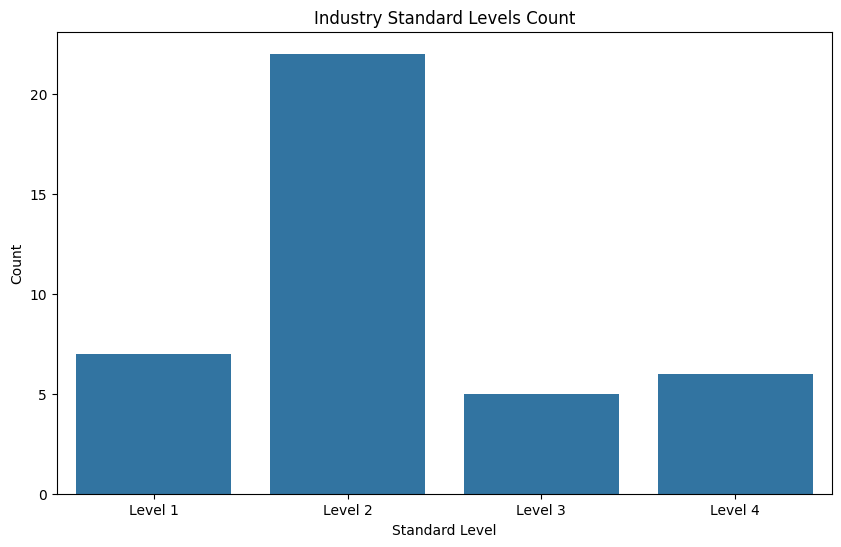


Detailed Industry Standard Levels - Feature Range:
                        Engine Size(L)                     Cylinders  \
                                   min       max    median       min   
Industry Standard Level                                                
Level 1                       1.500000  1.999999  1.999999  4.000000   
Level 2                       2.000000  2.999999  2.999999  4.000001   
Level 3                       3.000000  4.700000  4.000000  6.000000   
Level 4                       4.700001  6.300000  4.950000  8.000001   

                                             CO2 Emissions(g/km)              \
                               max    median                 min  max median   
Industry Standard Level                                                        
Level 1                   4.000000  4.000000                 136  214  202.0   
Level 2                   5.999999  5.999999                 217  267  240.5   
Level 3                   8.000000  8.00000

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype

# Extract CO₂ Emissions(g/km) feature range for each cluster (using K-Means as the industry standard)
cluster_summary = train_df.groupby('KMeans Cluster (Optimal)')['CO2 Emissions(g/km)'].agg(['min', 'max', 'median'])

# Sort by minimum value to ensure continuous intervals
cluster_summary = cluster_summary.sort_values('min').reset_index()

# Process gaps and calculate mean gap
gaps = cluster_summary['min'].values[1:] - cluster_summary['max'].values[:-1]
gap_midpoints = cluster_summary['max'].values[:-1] + gaps / 2

# Construct complete bins (insert gap midpoints into original interval boundaries)
bins = sorted(list(cluster_summary['min'].tolist()) + [cluster_summary['max'].max() + 1])
for idx, gap in enumerate(gaps):
    if gap > 1:  # Only add midpoint when gaps exist
        bins.append(gap_midpoints[idx])

bins = sorted(set(bins))  # Remove duplicates to ensure unique bins

# Create Level labels
labels = ['Level ' + str(i+1) for i in range(len(bins) - 1)]

def custom_level_assignment(value, bins, labels):
    # Primary interval check (left-closed, right-open)
    for idx in range(1, len(bins)):
        if bins[idx-1] <= value < bins[idx]:
            return labels[idx-1]
        elif value == (bins[idx-1] + bins[idx]) / 2:
            return labels[idx-1]  # Default to previous Level

    # Handle uncovered values
    if value < bins[0]:
        return labels[0]  # Below the minimum boundary
    elif value > bins[-1]:
        return labels[-1]  # Above the maximum boundary
    else:
        # Find the nearest gap
        for i in range(len(bins)-1):
            if bins[i] <= value <= bins[i+1]:
                midpoint = (bins[i] + bins[i+1]) / 2
                if value < midpoint:
                    return labels[i]  # Belongs to the previous Level
                else:
                    return labels[i+1]  # Belongs to the next Level
    return labels[-1]  # Default to the highest Level

# Apply custom assignment logic
train_df['Industry Standard Level'] = train_df['CO2 Emissions(g/km)'].apply(lambda x: custom_level_assignment(x, bins, labels))

# Convert to Categorical type to ensure correct sorting
level_order = sorted(train_df['Industry Standard Level'].unique())
train_df['Industry Standard Level'] = pd.Categorical(train_df['Industry Standard Level'], categories=level_order, ordered=True)

# Adjust CO₂ Emissions(g/km), Engine Size(L), and Cylinders ranges to ensure no overlap between Levels
def adjust_feature_ranges(df, level_col, feature_cols):
    for level in df[level_col].unique():
        # Get data for the current Level
        level_data = df[df[level_col] == level]
        
        # Calculate feature ranges for the current Level
        feature_ranges = level_data[feature_cols].agg(['min', 'max'])
        
        # Adjust ranges to ensure no overlap with other Levels
        for feature in feature_cols:
            min_val = feature_ranges.loc['min', feature]
            max_val = feature_ranges.loc['max', feature]
            
            if level != df[level_col].cat.categories[0]:
                prev_level = df[level_col].cat.categories[df[level_col].cat.categories.get_loc(level) - 1]
                prev_max = df[df[level_col] == prev_level][feature].max()
                min_val = max(min_val, prev_max + 1e-6)  # Add small offset
            
            if level != df[level_col].cat.categories[-1]:
                next_level = df[level_col].cat.categories[df[level_col].cat.categories.get_loc(level) + 1]
                next_min = df[df[level_col] == next_level][feature].min()
                max_val = min(max_val, next_min - 1e-6)  # Add small offset

            df.loc[df[level_col] == level, feature] = np.clip(
                df.loc[df[level_col] == level, feature],
                min_val,
                max_val
            )
    return df

# Adjust ranges for CO₂ Emissions(g/km), Engine Size(L), and Cylinders
train_df = adjust_feature_ranges(train_df, 'Industry Standard Level', ['CO2 Emissions(g/km)', 'Engine Size(L)', 'Cylinders'])

# Visualize Industry Standard Levels
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='Industry Standard Level')
plt.title('Industry Standard Levels Count')
plt.xlabel('Standard Level')
plt.ylabel('Count')
plt.show()

# Select specific feature ranges for each Level
detailed_summary = train_df.groupby('Industry Standard Level', observed=True)[
    ['Engine Size(L)', 'Cylinders', 'CO2 Emissions(g/km)']
].agg(['min', 'max', 'median'])

# Add min_new and max_new columns
min_new_values = []
max_new_values = []
for i in range(len(detailed_summary)):
    current_min = detailed_summary.iloc[i][('CO2 Emissions(g/km)', 'min')]
    current_max = detailed_summary.iloc[i][('CO2 Emissions(g/km)', 'max')]
    
    if i == 0:
        min_new = current_min
    else:
        prev_max_new = max_new_values[i-1]
        min_new = prev_max_new

    if i < len(detailed_summary) - 1:
        next_min = detailed_summary.iloc[i+1][('CO2 Emissions(g/km)', 'min')]
        max_new = current_max + (next_min - current_max) / 2
    else:
        max_new = current_max

    min_new_values.append(min_new)
    max_new_values.append(max_new)

# Add min_new and max_new to detailed_summary
detailed_summary[('CO2 Emissions(g/km)', 'min_new')] = min_new_values
detailed_summary[('CO2 Emissions(g/km)', 'max_new')] = max_new_values

print("\nDetailed Industry Standard Levels - Feature Range:")
print(detailed_summary)

print("\nFinal Level Ranges Based on CO₂ Emissions(g/km):")
for i in range(len(detailed_summary)):
    level = detailed_summary.index[i]
    co2_min_new = detailed_summary.iloc[i][('CO2 Emissions(g/km)', 'min_new')]
    co2_max_new = detailed_summary.iloc[i][('CO2 Emissions(g/km)', 'max_new')]
    engine_min = detailed_summary.iloc[i][('Engine Size(L)', 'min')]
    engine_max = detailed_summary.iloc[i][('Engine Size(L)', 'max')]
    cylinders_min = detailed_summary.iloc[i][('Cylinders', 'min')]
    cylinders_max = detailed_summary.iloc[i][('Cylinders', 'max')]

    print(f"{level}:")
    print(f"  CO₂ Emissions(g/km): {co2_min_new:.1f} - {co2_max_new:.1f}")
    print(f"  Engine Size(L): {engine_min:.1f} - {engine_max:.1f}")
    print(f"  Cylinders: {cylinders_min:.1f} - {cylinders_max:.1f}")
    print()
